In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#scene_dataset = "C:\\Users\\MatyuGuerrero\\Desktop\\Python\\Senior Project\\scenes" what data set is doing
scene_dataset = 'scenes' #put the filepath for the dataset
dataset_path = os.listdir(scene_dataset)
scene_types = os.listdir(scene_dataset)
print("The Scene Types are: ", scene_types) #what kind of scnene images are in this data set
print("Scenes types found:", len(scene_types))

The Scene Types are:  ['indoorCVPR_09_imgs', 'outdoorCVPR_09_imgs']
Scenes types found: 2


In [36]:
scenes = []

for item in scene_types: #This first for loop enters in our folder
    all_scenes = os.listdir(scene_dataset + '/' + item) #Gets all the file names
    #print(all_scenes)

    for scene in all_scenes: #This second list will get all the images of our folder
        scenes.append((item, str(scene_dataset + '/' + item) + '/' + scene)) 
        #print(scenes[:1])
scenes

[('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/00.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/000000.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/000106949b.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/000106949d.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/00036_NiagaraFalls4.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/00040220.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/0006.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/0009.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/000_0141_0001.jpg'),
 ('indoorCVPR_09_imgs',
  'scenes/indoorCVPR_09_imgs/00114320c9df07c3329506.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/0012.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/0020.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/0021550.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/003.jpg'),
 ('indoorCVPR_09_imgs', 'scenes/indoorCVPR_09_imgs/00320

In [37]:
#build a data frame

scenes_dataframe = pd.DataFrame(data = scenes, columns = ['scene type', 'image']) #scene type shows the class label
print(scenes_dataframe.head())
#print(scenes_dataframe.tail())



           scene type                                              image
0  indoorCVPR_09_imgs                   scenes/indoorCVPR_09_imgs/00.jpg
1  indoorCVPR_09_imgs               scenes/indoorCVPR_09_imgs/000000.jpg
2  indoorCVPR_09_imgs           scenes/indoorCVPR_09_imgs/000106949b.jpg
3  indoorCVPR_09_imgs           scenes/indoorCVPR_09_imgs/000106949d.jpg
4  indoorCVPR_09_imgs  scenes/indoorCVPR_09_imgs/00036_NiagaraFalls4.jpg


In [38]:
#check the size of the data set jtsu to see if balanced or unbalanced

print("Total number of scenes in the dataset:", len(scenes_dataframe))

scene_count = scenes_dataframe['scene type'].value_counts()

print("scnenes in each category:")
print(scene_count)

Total number of scenes in the dataset: 9936
scnenes in each category:
scene type
outdoorCVPR_09_imgs    5000
indoorCVPR_09_imgs     4936
Name: count, dtype: int64


In [39]:
import cv2

new_path = 'scenes/'

img_size = 224

images = []
labels = []

for i in scene_types:
    data_path =  new_path + str(i) #uhhhhhhhhh it works?
    filenames = [i for i in os.listdir(data_path)]
    #print(filenames) #get the names of all the imgs

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        
        #catches 'bad' imgs 
        if img is None:
            print(f"Error loading jpg: {data_path}/{f}")
            continue
        
        #print(img) #will get img as an array
        img = cv2.resize(img, (img_size, img_size))
        images.append(img)
        labels.append(i)

labels

['indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVPR_09_imgs',
 'indoorCVP

In [40]:
#transform the image to a numpy type

images = np.array(images)
images.shape 
#prints out (total number of imgs, the length size, the width size, the number of channels (rgb thus 3))

(9936, 224, 224, 3)

In [81]:
images = images.astype('float32')/255.0 #divides the pixel number just to make it smaller 
#not really needed but its good for simplicity 
#Uncomment and test after reduce the img list size

WORK ON THE CODE BELOW 


!!!!!!!!!!!!!!!!

In [60]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

y = scenes_dataframe['scene type'].values
#print(y[:5])

#for y 
y_labelencoder = LabelEncoder ()
y_encoded = y_labelencoder.fit_transform (y)
#print(y)
#print(y_encoded)


y = y.reshape(-1, 1)

ct = ColumnTransformer([('OneHotEncoder', OneHotEncoder(), [0])], remainder = 'passthrough')

Y = ct.fit_transform(y)
Y.shape
#print(Y)



[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [43]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state = 1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size = 0.05, random_state = 415)

#impact the shape of the training and testing
print(train_x.shape) #(number of images)
print(train_y.shape)
print(test_x.shape) #(number to test)
print(test_y.shape)



(9439, 224, 224, 3)
(9439, 2)
(497, 224, 224, 3)
(497, 2)


In [44]:
import numpy
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

import pydot 
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform

import scipy.misc
from matplotlib.pyplot import imshow
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D




Expination of the Code Below: (go to resNet using Keras 20:00)

Identity Block:
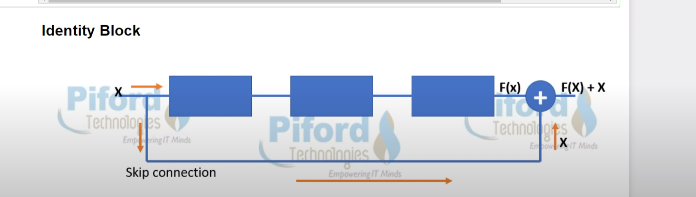

Remember if we make F(x) = 0 Then its easy for us to make input equal to 0 

Y = X + F(x) 
Y = X + 0 
Y = X 

So we created a function called identity_block with three parameters X, f, filters

It goes through layer by layer then at the last layer we are adding X which was changed by the layers 
To X which we stored at the beginning

In otherwords X_changed + X_inital

each layer we use the library functions of Conv2D, BatchNorm, and a Activation function

Conv2D is a 2D convelution layer which performs convolutions on 3D input data such as img tensors
    Filters: The number of filters/kernls to apply to the input - Place holder for number of filters
    
    kernel_size: The size of the convolutional filters - the filters are 1x1 in size, meaning they operate on a single filter
    
    strides: is the step size of the filter as it moves across the input in other words the filter moves one pixel at a time vertically and horizontally

    padding: this determins the type of padding, valid means no padding. The fiter is only applied to posistions where the entire filter fits inside the input data

    The result is stored in X

BatchNorm is a technique used to improve the training stability and convergence of deep NN. 
    axis = 3: specifies the axis which normalization is performed. In this case it is 3 which correspns to the channel axis in a 4D tensor
    
    The result of this norm is applied back to X

Activation this is a function 
    ReLu applies the ReLU activation function to the input tensor X

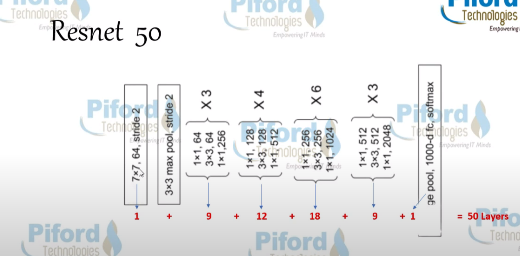

TLDR: 

In resnet50 there are 3 identity blocks thus we will use layers in groups of 3

First layer will use a filter size of 1x1
Second layer will use a filter size of 3x3 
Last layer will use filter size of 1x1

First block happens 3 times, second block 4 times, 3rd 6 times, and last blcok 3 times
Since its groups of 3 - 3x3, 4x3, 6x3, 3x3, 
First stride Second Stride = 1+1 = 2

Thus 2 + 9 + 12 + 18 + 9 + 1 = 50, which is why its called resNet50




In [45]:
def identity_block(X, f, filters):
    #retrive filters
    F1, F2, F3 = filters #F1 =64, F2 = 64, F3 = 256

    X_inital = X #stroing the value of X, because the value of X will change in each layer

    #First Layer
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X) #ReLu transforms neg pixel values to 0 removes the problem of vanishing gradient

    #Second Layer
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    #Third Layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    #Final step: Add shortcut value to F(X), and pass it through a ReLu activation function
    X = Add()([X, X_inital])
    X = Activation('relu')(X)

    return X


Identity blcok when input size == output size
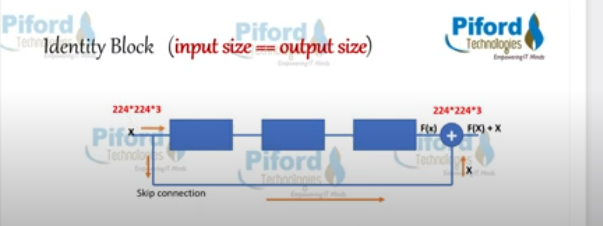

Convolutional Block Input Size != Output Size
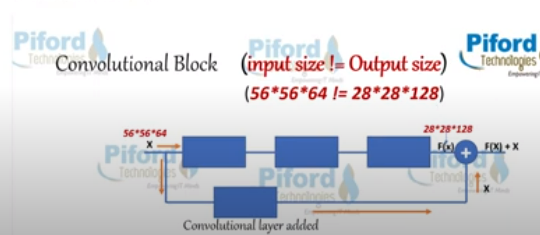

This means we cant use the identity block because the input and output is different

So what we have to do is add a layer in the shortcut

There are 2 option for matching the output size
1 padding the input volume
2 perform 1x1 convolutions

n = img size
P = padding 
f = size of filter 
s = stride

P = 0 cus no padding

((n+2P-f)/s) + 1 * ((n+2P-f)/s) + 1 = ((n+-f)/s) + 1 * ((n+-f)/s) + 1  = ((56-1)/2) + 1 * ((56-1)/2) + 1
= 28 * 28 = 128, now it is the same after going through the block

So again when input == output we use the identity blcok

when the input size of the img != output size we use the convolutional block

In [46]:
def convolutional_block(X, f, filters, s = 2):
   
    F1, F2, F3 = filters #Number of filters

    X_inital = X # Save the input value

    #First Layer
    X = Conv2D(F1, (1, 1), strides = (s, s))(X) 
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    #Second Layer
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X) 
    X = Activation('relu')(X)

    #Third Layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    #ShortCut Path
    X_inital = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s, s), padding = 'valid')(X_inital)
    X_inital = BatchNormalization(axis = 3)(X_inital)

    # now we add the shortcut BACK into the passed layers and pass it through a ReLU function
    X = Add()([X, X_inital])
    X = Activation('relu')(X)

    return X

This is the ResNet50 structure:

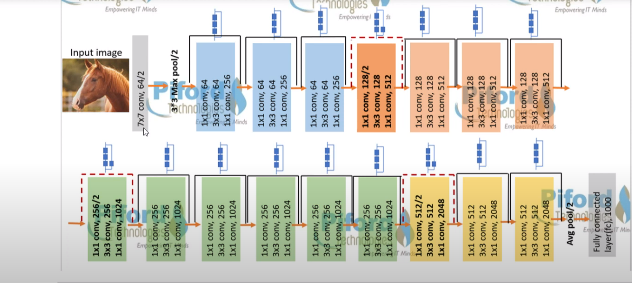

So in our structure we will perform 64 filters of stride 2 with size 7x7 (we use stride 2 cus we are reducing the size of the img by increasing the stride)

We do this to prevent the vanishing gradient

In [47]:
def ResNet50(input_shape = (224, 224, 3), classes = 2): #2 classes because of indoors and outdoors, the shape is due to the size of the img I chose (L, W, dimenension)

    #Define the input with shape input_shape
    X_input = Input(input_shape)

    #Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3, 3 padding

    #Stage 1
    X = Conv2D(64 , (7,7), strides = (2, 2))(X)
    X = BatchNormalization(axis = 3)(X) 
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides = (2, 2))(X)

    #Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)

    #the 3 lines below are conv layers from the conolutional _block function defined above
    #X = Conv2D(F1, (1, 1), strides = (s, s))(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1, 1), padding = 'same')(X)
    #X = Conv2D(F3, (1, 1), strides = (s, s), name = conv_name_base + '2a')(X)

    X = identity_block(X, 3, [64, 64, 256])
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(X)

    X = identity_block(X, 3, [64, 64, 256])
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1, 1), padding = 'valid')(X)

    #Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    #Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    #Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    #AVGPool 
    X = AveragePooling2D((2, 2), name = "avg_pool")(X)

    ### STAGES COMPLETED ###

    X = Flatten()(X)
    X = Dense(classes, activation = 'softmax', name = 'fc' + str(classes), kernel_initializer = glorot_uniform(seed = 0))(X)

    #Create Model
    model = Model(inputs = X_input, outputs = X, name = 'ResNet50')
    
    return model

In [48]:
model = ResNet50(input_shape = (224, 224, 3), classes = 2)

In [49]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv2d_53 (Conv2D)          (None, 112, 112, 64)         9472      ['zero_padding2d_1[0][0]']    
                                                                                                  
 batch_normalization_53 (Ba  (None, 112, 112, 64)         256       ['conv2d_53[0][0]']    

In [51]:
model.fit(train_x, train_y, epochs = 3, batch_size = 32)

Epoch 1/3
295/295 [==============================] - 1809s 6s/step - loss: 1.0434 - accuracy: 0.8106
Epoch 2/3
295/295 [==============================] - 1849s 6s/step - loss: 0.3745 - accuracy: 0.8827
Epoch 3/3
295/295 [==============================] - 1832s 6s/step - loss: 0.2437 - accuracy: 0.9106


In [52]:
preds = model.evaluate(test_x, test_y)
print("Loss = " + str(preds[0]))
print("Test Accuracy = " + str(preds[1]))

16/16 [==============================] - 34s 2s/step - loss: 0.3132 - accuracy: 0.8592
Loss = 0.31318673491477966
Test Accuracy = 0.8591549396514893


Testing model on Sent in Data

In [1]:
from matplotlib.pyplot import imread

threshold = 0.5

#Uncomment out after

img_path =  'out5.jpg'
img_test = image.load_img(img_path, target_size = (224, 224))
x = image.img_to_array(img_test)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

print('Input image shape: ', x.shape)
my_image = imread(img_path)
imshow(my_image)

prediction = model.predict(x)
#print(prediction)

if prediction[0, 0] > threshold:
    result = [1, 0] #indoors    
    result_words = 'the img is indoors'
else:
    result = [0, 1] #outdoors
    result_words = 'the img is outdoors'

print("Results: ", result, result_words)







NameError: name 'image' is not defined